<a href="https://colab.research.google.com/github/AldousSama/Tarea1/blob/main/Clima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2023-11-02 23:43:41--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.109.21, 52.217.117.120, 52.216.51.8, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.109.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  14.8MB/s    in 0.9s    

2023-11-02 23:43:43 (14.8 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


In [3]:
import os
fname = os.path.join("jena_climate_2009_2016.csv")
with open(fname) as f:
   data = f.read()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]
print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [4]:
import numpy as np
temperature = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
  values = [float(x) for x in line.split(",")[1:]]
  temperature[i] = values[1]
  raw_data[i, :] = values[:]



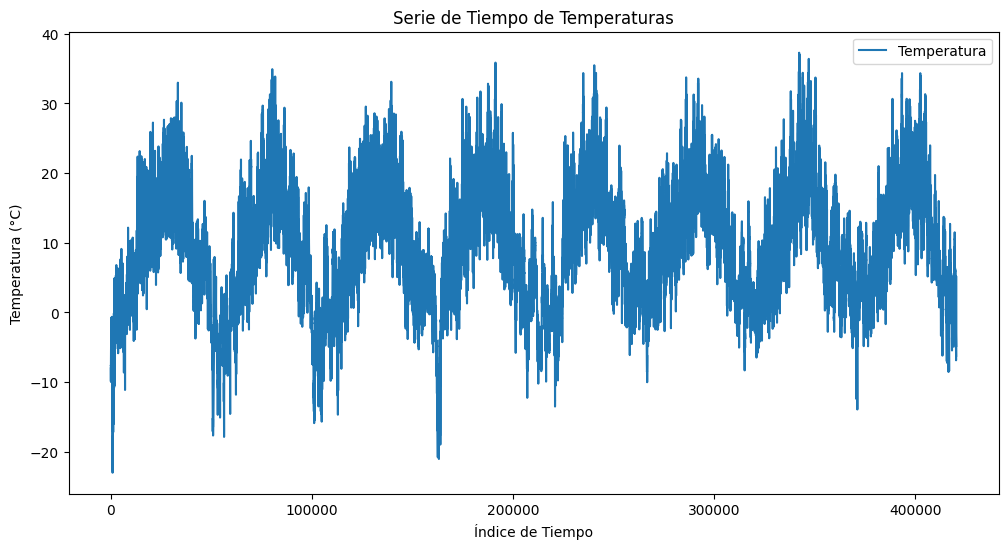

In [5]:
import matplotlib.pyplot as plt

# Suponiendo que 'temperature' contiene los datos de temperatura
plt.figure(figsize=(12, 6))
plt.plot(temperature, label='Temperatura')
plt.xlabel('Índice de Tiempo')
plt.ylabel('Temperatura (°C)')
plt.title('Serie de Tiempo de Temperaturas')
plt.legend()
plt.show()


In [6]:
import numpy as np

# Define la longitud de las secuencias
sequence_length = 120

# Genera las secuencias y los objetivos
sequences = []
targets = []
for i in range(len(temperature) - sequence_length):
    sequences.append(temperature[i:i + sequence_length])
    targets.append(temperature[i + sequence_length])

# Convierte las listas a arrays NumPy
sequences = np.array(sequences)
targets = np.array(targets)

# Divide los datos en conjuntos de entrenamiento, validación y prueba (50% train, 25% val, 25% test)
split_train = int(0.5 * len(sequences))
split_val = int(0.75 * len(sequences))

x_train = sequences[:split_train]
y_train = targets[:split_train]

x_val = sequences[split_train:split_val]
y_val = targets[split_train:split_val]

x_test = sequences[split_val:]
y_test = targets[split_val:]

# Verifica las formas de los conjuntos de datos
print("Forma de x_train:", x_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de x_val:", x_val.shape)
print("Forma de y_val:", y_val.shape)
print("Forma de x_test:", x_test.shape)
print("Forma de y_test:", y_test.shape)


Forma de x_train: (210165, 120)
Forma de y_train: (210165,)
Forma de x_val: (105083, 120)
Forma de y_val: (105083,)
Forma de x_test: (105083, 120)
Forma de y_test: (105083,)


In [7]:
!pip install tensorflow


In [10]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define la arquitectura del modelo LSTM
model = Sequential()
model.add(LSTM(16, activation='relu', input_shape=(120, 1)))
model.add(Dropout(0.2))  # Dropout para regularización
model.add(BatchNormalization())  # Batch Normalization para normalización
model.add(Dense(1))  # Capa de salida con 1 unidad para la predicción de temperatura

# Compila el modelo con el optimizador Adam y función de pérdida MSE
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error')


x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_val_reshaped = x_val.reshape((x_val.shape[0], x_val.shape[1], 1))

# Entrena el modelo con un tamaño de lote de 16 y 5 épocas
model.fit(x_train_reshaped, y_train, epochs=5, batch_size=10, validation_data=(x_val_reshaped, y_val))



Epoch 1/5
21017/21017 [==============================] - 986s 47ms/step - loss: 44.1465 - val_loss: 12.9804
Epoch 2/5
21017/21017 [==============================] - 1000s 48ms/step - loss: 22.7948 - val_loss: 7.6345
Epoch 3/5
21017/21017 [==============================] - 991s 47ms/step - loss: 19.9746 - val_loss: 3.9560
Epoch 4/5
21017/21017 [==============================] - 995s 47ms/step - loss: 18.0316 - val_loss: 1.2563
Epoch 5/5
21017/21017 [==============================] - 946s 45ms/step - loss: 13.6735 - val_loss: 0.7779


In [12]:
# Guarda el modelo en el formato nativo de Keras
model.save('modelo_lstm.keras')

print("Modelo guardado correctamente en formato nativo de Keras.")



Modelo guardado correctamente en formato nativo de Keras.


In [13]:
import numpy as np

#  'x_train' es mi conjunto de datos de temperaturas originales
# 'x_train' tiene la forma (número_de_secuencias, longitud_de_secuencia)

# Parámetro que controla la intensidad del ruido
intensidad_ruido = 0.1

# Genera ruido con la misma forma que 'x_train'
ruido = np.random.normal(loc=0, scale=intensidad_ruido, size=x_train.shape)

# Añade el ruido a los datos originales
x_train_ruidoso = x_train + ruido

# Ahora 'x_train_ruidoso' contiene variaciones ligeras de tus datos originales con ruido añadido


In [15]:
from tensorflow.keras.models import load_model

modelo_entrenado = load_model('modelo_lstm.keras')

x_train_ruidoso_reshaped = x_train_ruidoso.reshape((x_train_ruidoso.shape[0], x_train_ruidoso.shape[1], 1))

predicciones = modelo_entrenado.predict(x_train_ruidoso_reshaped)




6568/6568 [==============================] - 70s 11ms/step


In [20]:
n = 20  # Número de predicciones
print(predicciones[:n])


[[-4.584013 ]
 [-4.520729 ]
 [-4.7203116]
 [-4.3953934]
 [-4.5760245]
 [-4.6213346]
 [-4.1842685]
 [-4.6082177]
 [-4.519342 ]
 [-4.645934 ]
 [-4.146153 ]
 [-4.224836 ]
 [-3.9458156]
 [-4.0470643]
 [-4.008087 ]
 [-3.7289395]
 [-3.6024852]
 [-3.8040786]
 [-4.0544868]
 [-3.8471375]]


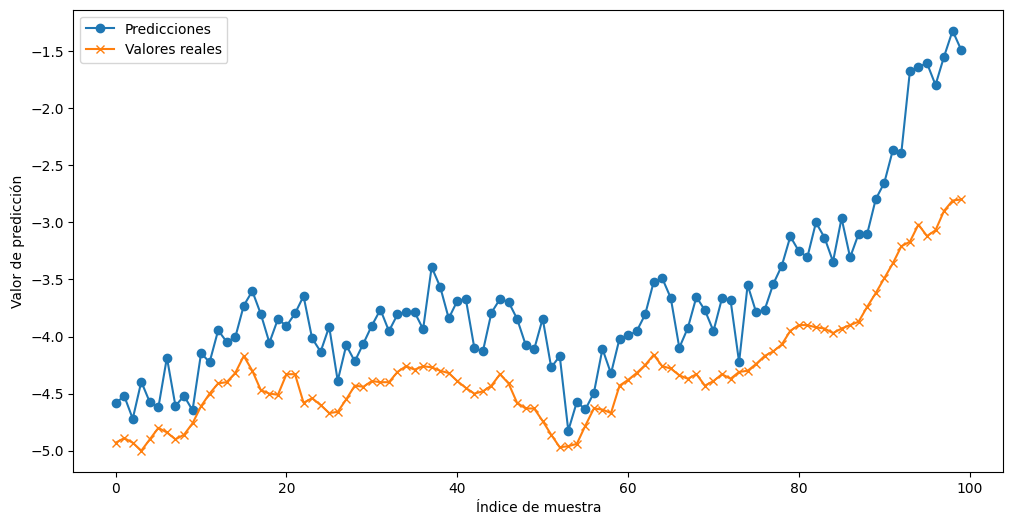

In [27]:
import matplotlib.pyplot as plt

n = 100
plt.figure(figsize=(12, 6))
plt.plot(predicciones[:n], label='Predicciones', marker='o')
plt.plot(y_train[:n], label='Valores reales', marker='x')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor de predicción')
plt.legend()
plt.show()


In [18]:

sequence_length = 120

sequences_temperature = []
for i in range(len(temperature) - sequence_length):
    sequences_temperature.append(temperature[i:i + sequence_length])

# Convierto la lista de secuencias a un array de NumPy
sequences_temperature = np.array(sequences_temperature)

sequences_temperature_reshaped = sequences_temperature.reshape((sequences_temperature.shape[0], sequences_temperature.shape[1], 1))


predicciones_temperature = modelo_entrenado.predict(sequences_temperature_reshaped)




13136/13136 [==============================] - 146s 11ms/step


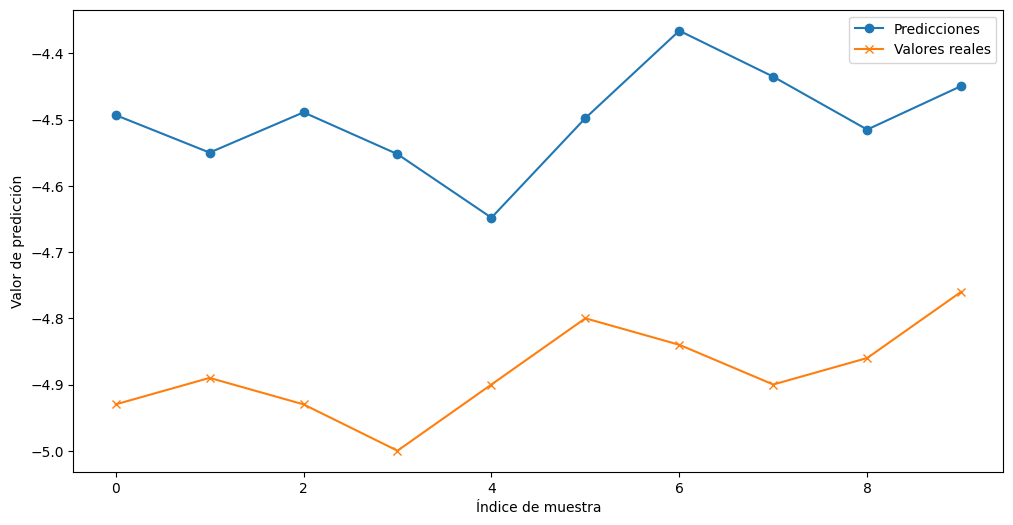

In [25]:
import matplotlib.pyplot as plt

n = 10  # este es el numero de predicciones que quiero ver
plt.figure(figsize=(12, 6))
plt.plot(predicciones_temperature[:n], label='Predicciones', marker='o')
plt.plot(y_train[:n], label='Valores reales', marker='x')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor de predicción')
plt.legend()
plt.show()

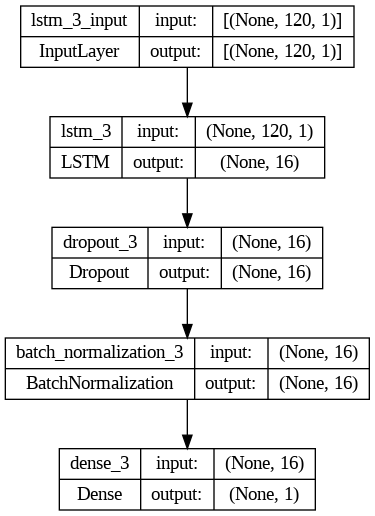

In [23]:
from tensorflow.keras.utils import plot_model
plot_model(modelo_entrenado, to_file='modelo.png', show_shapes=True, show_layer_names=True)


In [29]:

pressure_data = []  # Lista para almacenar datos de presión

for line in lines:
    values = line.split(",")
    if len(values) >= 14:  # Verifica si la línea tiene suficientes columnas
        pressure = float(values[1].strip('"'))  # Accede a la columna de presión (índice 1)
        pressure_data.append(pressure)




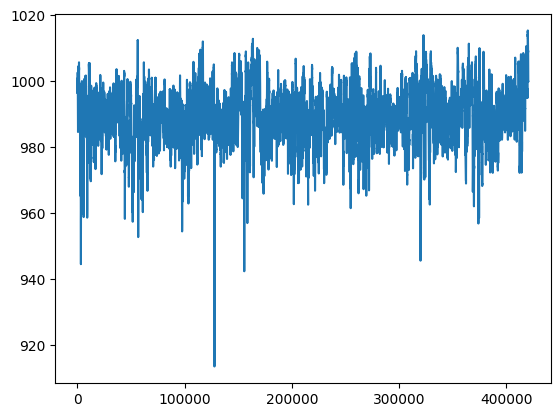

In [30]:
from matplotlib import pyplot as plt
plt.plot(range(len(pressure_data)), pressure_data)

In [31]:
import numpy as np

# Define la longitud de las secuencias y el retraso
sequence_length = 120
delay = 10

# Genera las secuencias y los objetivos para la presión
sequences = []
targets = []
for i in range(len(pressure_data) - sequence_length - delay):
    sequences.append(pressure_data[i:i + sequence_length])
    targets.append(pressure_data[i + sequence_length + delay])

# Convierte las listas a arrays NumPy
sequences = np.array(sequences)
targets = np.array(targets)

# Divide los datos en conjuntos de entrenamiento, validación y prueba (50% train, 25% val, 25% test)
split_train = int(0.5 * len(sequences))
split_val = int(0.75 * len(sequences))

x_train = sequences[:split_train]
y_train = targets[:split_train]

x_val = sequences[split_train:split_val]
y_val = targets[split_train:split_val]

x_test = sequences[split_val:]
y_test = targets[split_val:]


Epoch 1/10
13135/13135 [==============================] - 100s 8ms/step - loss: 2093.1616 - val_loss: 21088.1211
Epoch 2/10
13135/13135 [==============================] - 101s 8ms/step - loss: 1282.4684 - val_loss: 21971.3906
Epoch 3/10
13135/13135 [==============================] - 97s 7ms/step - loss: 1274.2469 - val_loss: 24926.1621
Epoch 4/10
13135/13135 [==============================] - 108s 8ms/step - loss: 1278.3756 - val_loss: 23819.1973
Epoch 5/10
13135/13135 [==============================] - 101s 8ms/step - loss: 1279.2205 - val_loss: 18388.5879
Epoch 6/10
13135/13135 [==============================] - 106s 8ms/step - loss: 1277.1415 - val_loss: 27449.1445
Epoch 7/10
13135/13135 [==============================] - 106s 8ms/step - loss: 1275.2793 - val_loss: 30084.8223
Epoch 8/10
13135/13135 [==============================] - 100s 8ms/step - loss: 1266.8474 - val_loss: 22948.2754
Epoch 9/10
13135/13135 [==============================] - 99s 8ms/step - loss: 1260.1626 - val_lo

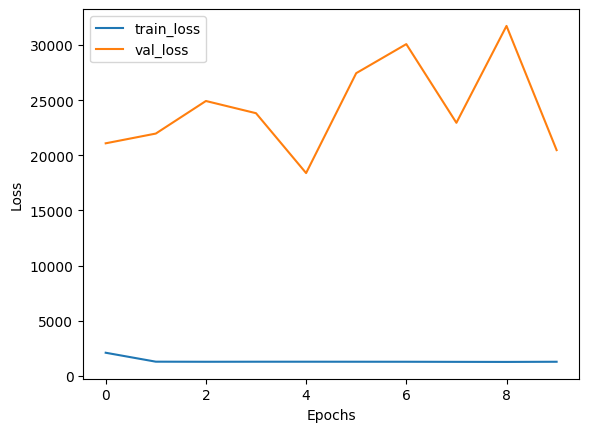

In [35]:
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dropout(0.2))  # Capa Dropout para regularización
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.5))  # Dropout adicional
model.add(Dense(1, kernel_regularizer=L1L2(l1=0.01, l2=0.01)))

# Compila el modelo con el optimizador Adam y función de pérdida MSE
model.compile(optimizer='adam', loss='mean_squared_error')


x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_val_reshaped = x_val.reshape((x_val.shape[0], x_val.shape[1], 1))

history = model.fit(x_train_reshaped, y_train, epochs=10, batch_size=16, validation_data=(x_val_reshaped, y_val))

# Grafica la pérdida en el conjunto de entrenamiento y validación
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

